In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='girishmallya123', api_key='QblXa4PKX3IrYLaCzKDb')

In [2]:
df= pd.read_csv("application_train.csv")

In [3]:
print(df.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0 

In [7]:
df_t1=df.loc[df['TARGET'] == 1]

x=4000000,y=1.6e-06


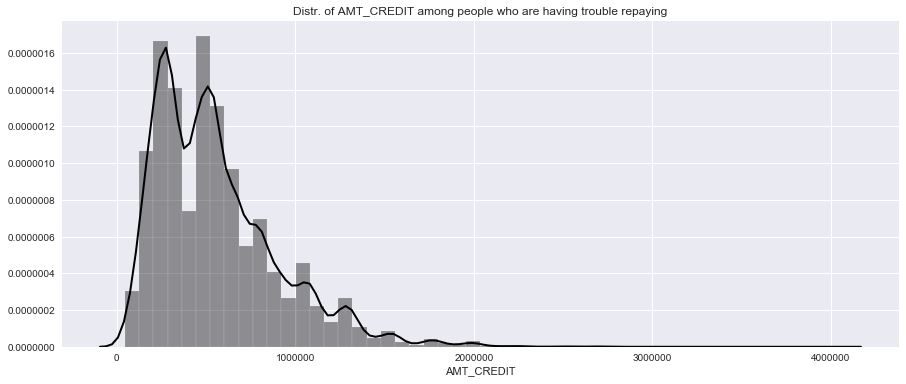

In [62]:
plt.figure(figsize=(15,6))
plt.title("Distr. of AMT_CREDIT among people who are having trouble repaying")
ax=sns.distplot(df_t1['AMT_CREDIT'], hist=True, kde=True, 
            color = 'black', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 2})
data_x, data_y = ax.lines[0].get_data()
xi = 4000000 # coordinate where to find the value of kde curve
yi= 0.0000016
#yi = np.interp(xi,data_x, data_y)
print ("x={},y={}".format(xi, yi)) 
#ax.plot([0],[yi], marker="o")
plt.show()

In [63]:
df_t0=df.loc[df['TARGET'] == 0]

x=4000000,y=1.6e-06


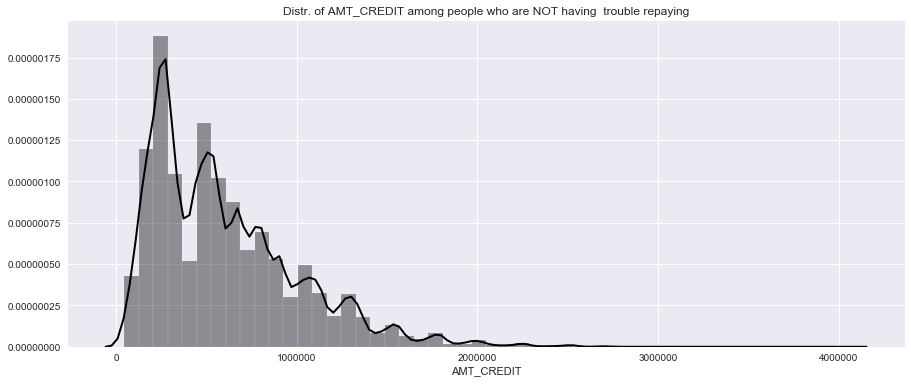

In [65]:
plt.figure(figsize=(15,6))
plt.title("Distr. of AMT_CREDIT among people who are NOT having  trouble repaying")
ax=sns.distplot(df_t0['AMT_CREDIT'], hist=True, kde=True, 
            color = 'black', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 2})
data_x, data_y = ax.lines[0].get_data()
xi = 4000000 # coordinate where to find the value of kde curve
yi= 0.0000016
#yi = np.interp(xi,data_x, data_y)
print ("x={},y={}".format(xi, yi)) 
#ax.plot([0],[yi], marker="o")
plt.show()

In [104]:
len(df)

307511

In [68]:
df_z=df.groupby(['TARGET'],as_index=False)['AMT_CREDIT'].mean()

In [69]:
df_z.head()

,TARGET,AMT_CREDIT
0,0,602648.282002
1,1,557778.527674


In [120]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


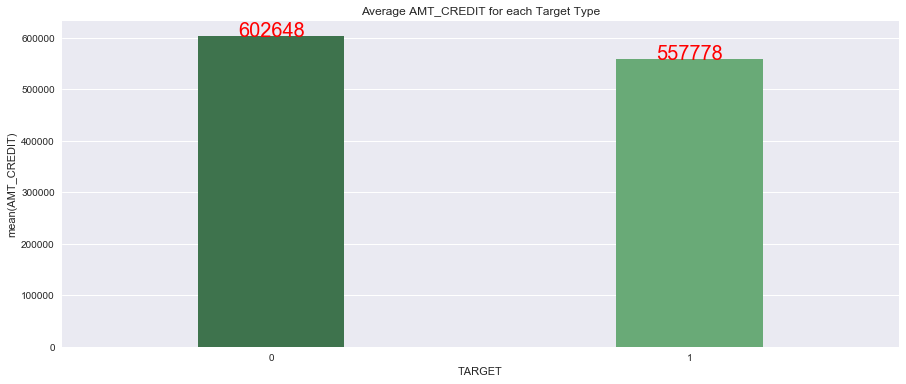

In [122]:
plt.figure(figsize=(15,6))
plt.title("Average AMT_CREDIT for each Target Type")
df_z=df.groupby(['TARGET'],as_index=False)['AMT_CREDIT'].mean()

pal = sns.color_palette("Reds_d", len(df_z))
total = float(len(df))
pal = sns.color_palette("Greens_d", len(df_z))
ax=sns.barplot(x='TARGET',y='AMT_CREDIT',data=df_z,palette=np.array(pal[::-1])[rank])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            int(p.get_height()),
            ha="center", color='Red',size=20) 

change_width(ax, .35)
plt.show()

In [140]:

labels = ['Target 1','Target 0']
values = [557778,602648]
colors = ['#FEBFB3', '#E1396C']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')